In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Afficher mon dataset en entier
pd.set_option("max_columns", None)
pd.set_option("max_row", 20)

# Analyse Exploratoire

In [4]:
# Chargement du dataset
df = pd.read_excel ('Dataset-coeur.xlsx')

In [5]:
# visualisation du dataset
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


* Vu qu'il peut arriver que j'ai besoin du dataset d'origine, je décide alors de le duppliquer afin de travailler sur la copie.

In [6]:
df1=df.copy()
df1

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


Mon dataset présente 918 lignes et 12 colonnes. De mon point de vue, le nombre de lignes par rapport au nombre de colone est assez conséquent pour effectuer une bonne analyse. Cela ne pose pas de problème.

In [7]:
# Voir s'il y a des données qui ont été dupliqués

df1.duplicated().sum()

0

Je constate que je n'ai pas de données duppliquées dans mon dataset

In [8]:
# verification de données manquantes en %

(df1.isna().sum()/df1.shape[0]).sort_values()*100

AGE            0.0
SEXE           0.0
TDT            0.0
PAR            0.0
CHOLESTEROL    0.0
GAJ            0.0
ECG            0.0
FCMAX          0.0
ANGINE         0.0
DEPRESSION     0.0
PENTE          0.0
CŒUR           0.0
dtype: float64

Au regard de ce qui précède, je constate que mon jeu de données ne contient pas de données manquantes

#### RENOMINATION DE CERTAINES COLONES

* Pour une meilleure exploitation de mon jeu de données, je décide de renommer certaines colonnes pour bien les comprendre

In [9]:

df1.rename(columns={'TDT': 'Typ_douleur_thor', 
                  'PAR' : 'Pression_art_orepos',
                   'GAJ' : 'Glycémie_à_jeun',
                   'ECG' : 'Result_électrocard',
                    'FCMAX':'Fréqce_card_max',
                    'DEPRESSION ' : 'DEPRESSION'}, inplace=True)
df1.head()

,AGE,SEXE,Typ_douleur_thor,Pression_art_orepos,CHOLESTEROL,Glycémie_à_jeun,Result_électrocard,Fréqce_card_max,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


### EXAMEN DE LA VARIABLE CIBLE

In [10]:
df1['CŒUR'].value_counts()

1    508
0    410
Name: CŒUR, dtype: int64

<AxesSubplot:ylabel='CŒUR'>

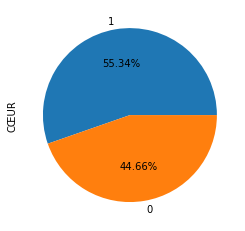

In [11]:
df1['CŒUR'].value_counts().plot.pie(autopct = '%1.2f%%')

* 55.34% de personnes sont atteintes de maladies cardiaques contre 44.66% en bonne santé.

### EXAMEN DES VARIABLES QUALITATIVES INDIVIDUELLEMENT

In [12]:
# verification des donnees qualit
var_quali = df1.select_dtypes(include="object").columns
var_quali

Index(['SEXE', 'Typ_douleur_thor', 'Result_électrocard', 'ANGINE', 'PENTE'], dtype='object')

* En visualisant le dataset, je note la présence de variables quantitatives discrète (binaires : 0, 1). Je décide donc de les ajouter à mes variables qualitatives pour une meilleure exploitation de mon jeu de données

In [13]:
var_quali=df1[['SEXE', 'Typ_douleur_thor', 'Result_électrocard', 'ANGINE', 'PENTE', 'Glycémie_à_jeun']]
var_quali

,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
0,homme,AA,Normal,Non,Ascendant,0
1,femme,DNA,Normal,Non,Plat,0
2,homme,AA,ST,Non,Ascendant,0
3,femme,ASY,Normal,Oui,Plat,0
4,homme,DNA,Normal,Non,Ascendant,0
...,...,...,...,...,...,...
913,homme,AT,Normal,Non,Plat,0
914,homme,ASY,Normal,Non,Plat,1
915,homme,ASY,Normal,Oui,Plat,0
916,femme,AA,LVH,Non,Plat,0


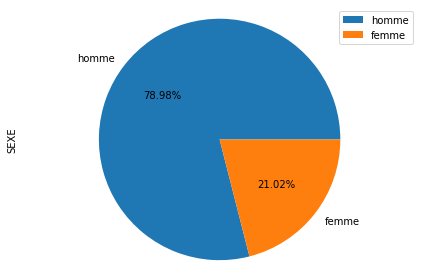

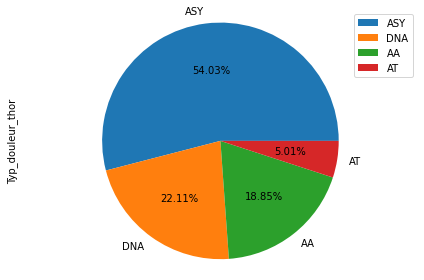

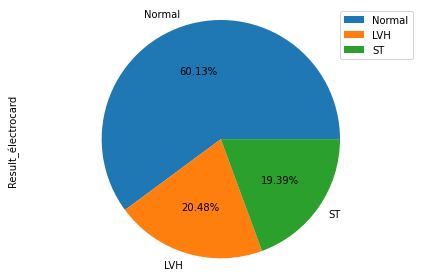

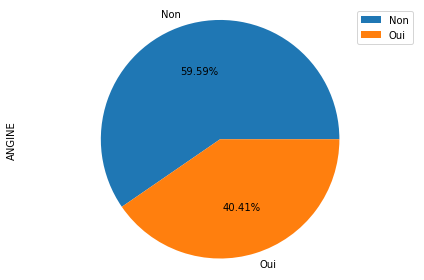

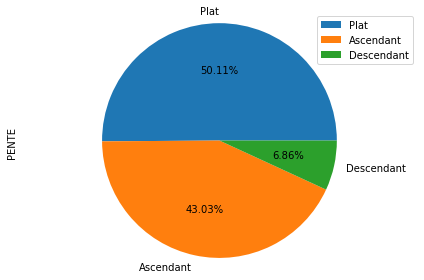

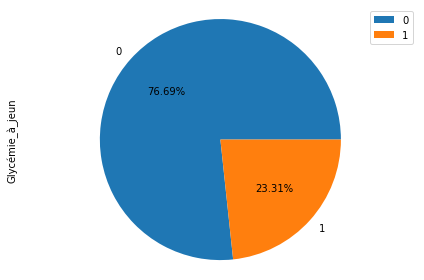

In [14]:
# Viusalisation des variables qualit

for col in var_quali:
    plt.figure()
    df1[col].value_counts().plot.pie(autopct='%1.2f%%')
    plt.axis('equal') 
    plt.legend()
    #plt.title('Distribution de ' + col)
    plt.tight_layout()

* Le dataset contient 78.98% d'hommes contre 21.02% de femmes. Ceci est un réel déséquilibre qui peut fausser nos calculs à l'avenir. Normalement on devrait partir sur une base de 50% de chaque ou avec une différence légère.

### EXAMEN DES VARIABLES QUANTITATIVES INDIVIDUELLEMENT

In [15]:
var_quant = df1[['AGE', 'Pression_art_orepos', 'CHOLESTEROL',
       'Fréqce_card_max', 'DEPRESSION']]
var_quant

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [16]:
from scipy.stats import norm

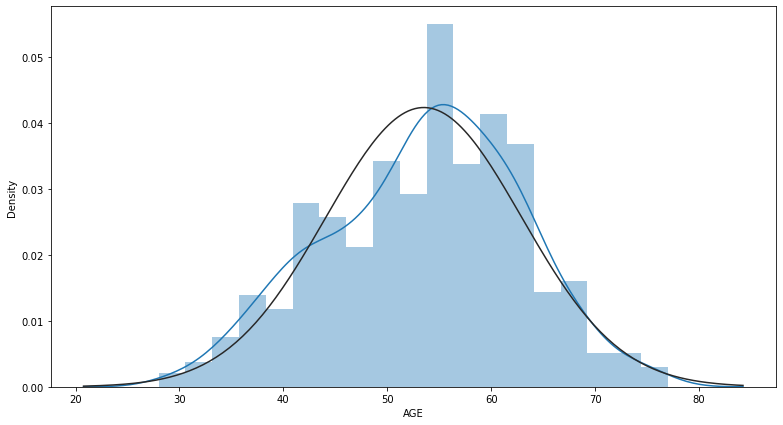

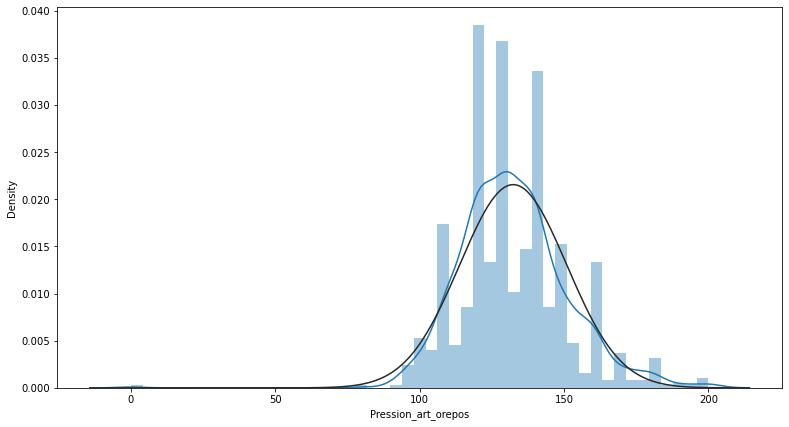

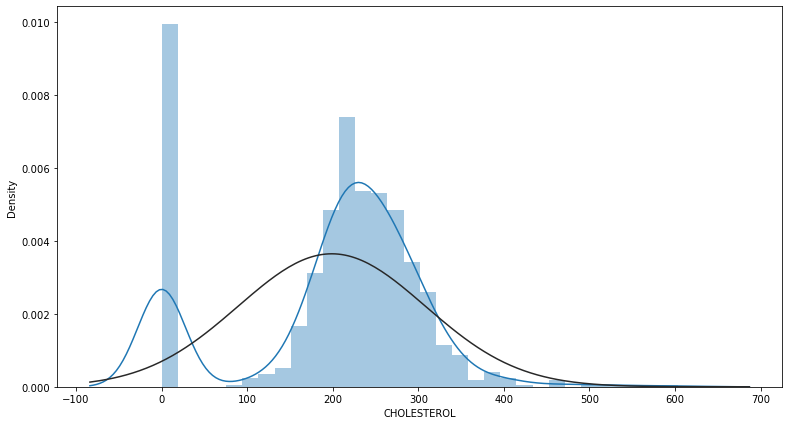

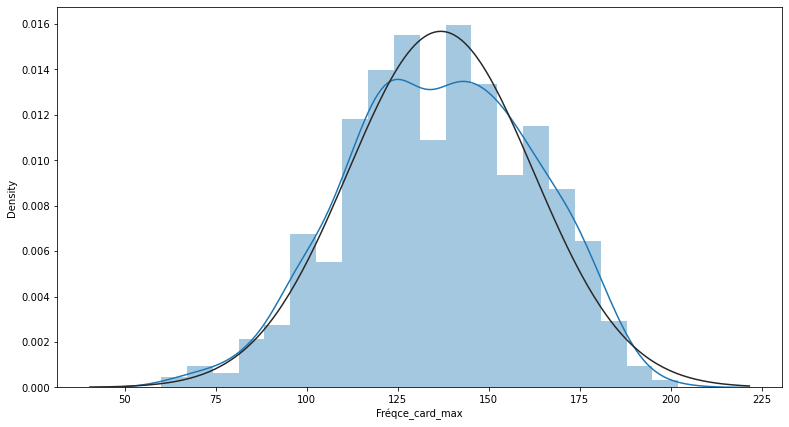

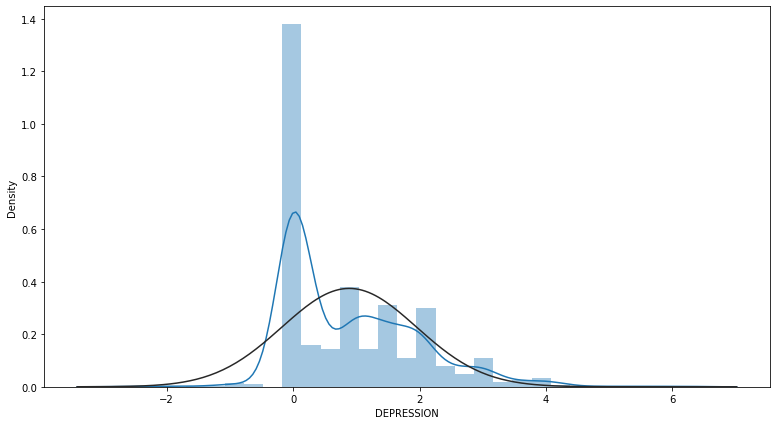

In [17]:
# Visualistaion des variables quantitatives

for col in var_quant:
    plt.figure(figsize=(13,7))
    sns.distplot(var_quant[col], fit=norm)

In [18]:
var_quant.describe().rename({"50%":'médiane'})

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
médiane,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


* Au regard des distributions sur le graphique, les variables 'AGE', 'Pression_art_orepos' et 'Fréqce_card_max' suivent une loi normale. Cela s'explique par le fait que la moyenne de chacune d'elle est presqu'égale à la médiane.

* Les variables 'CHOLESTEROL' et 'DEPRESSION' ont des distributions asymétriques. Cela s'explique par le fait que la moyenne de chacune d'elle est différente de la médiane. par exemple, 'CHOLESTEROL' a une moyenne de 198.79 contre une médiane de 223.0

### EXAMEN DES VARIABLES QUANTITATIVES 2 A 2

<AxesSubplot:>

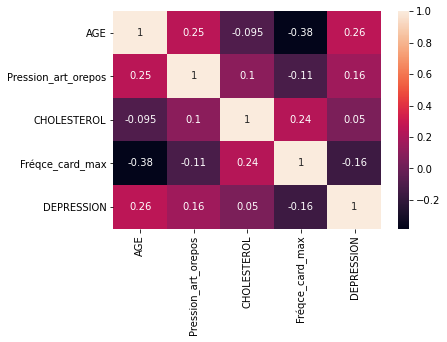

In [19]:
sns.heatmap(var_quant.corr(), annot=True)

* On constate que les variables ci-dessus n'entretiennent pas de rapport de corrélation.
   * L'AGE et la fréquence cardiaque maximale sont corrélés négativement. Cela dit, plus l'age des personnes est avancée, plus leur Fréquence cardiaque est faible.
   * La fréquence cardiaque et la Dépression entretiennent un rapport de corrélation négative. En clair,  Lorsque la fréquence cardiaque est élévée, le risque de faire nune dépression est faible.

### EXAMEN TARGET / VARIABLES QUALIT

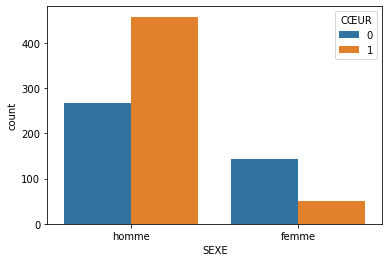

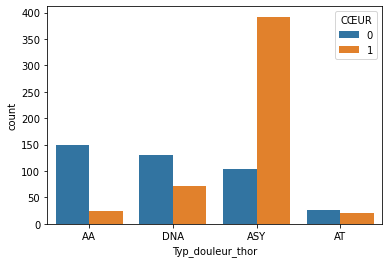

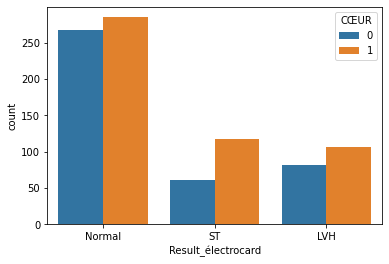

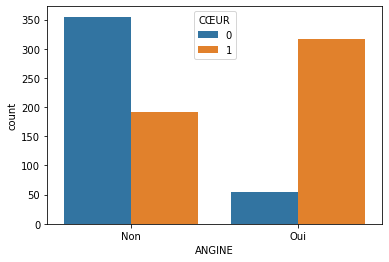

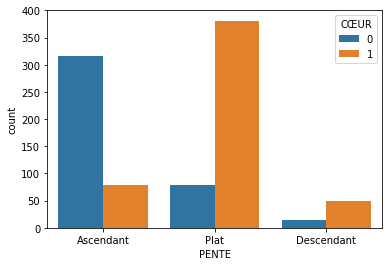

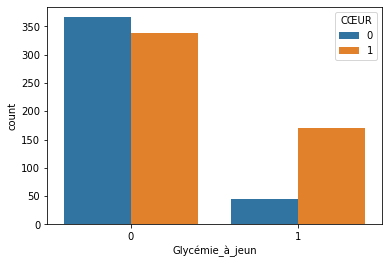

In [20]:
for col in var_quali.columns:
    plt.figure()
    sns.countplot(x = col, hue = 'CŒUR', data = df1)

* La proportion d'hommes atteint de maladie cardiaque est plus élévé que celui des femmes. Par conséquent on peut supposer que les hommes sont le plus succeptible de faire la maladie
* Au nombre des types de douleur thoracique (TDT), la douleur asymptomatique (ASY) est fortement causé par les maladies cardiques car elles présentent toutes 2 un fort taux de corrélation.

### EXAMEN TARGET / VARIABLES QUANTIT

In [21]:
var_quant

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [22]:
pres_maladie = df1[(df1["CŒUR"] == 1)]

In [23]:
absce_maladie = df1[(df1["CŒUR"] == 0)]

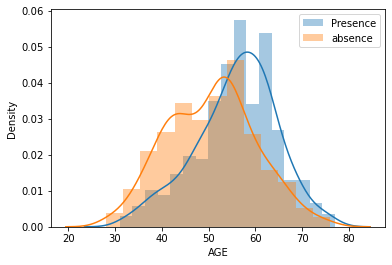

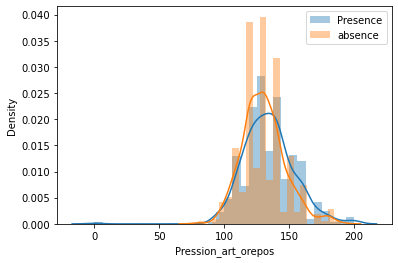

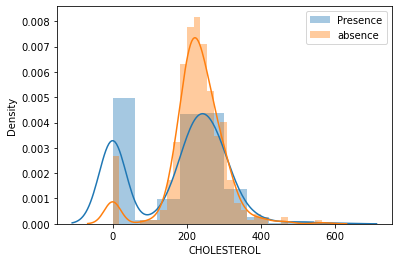

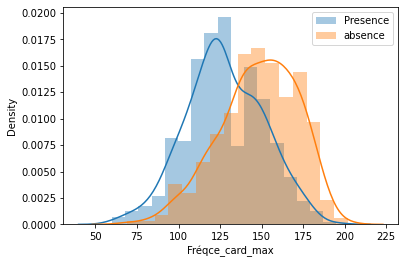

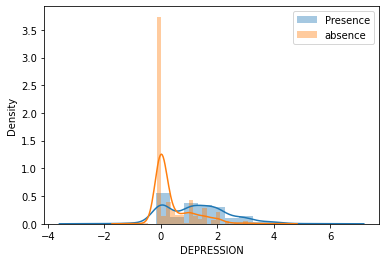

In [24]:
for col in var_quant:
    plt.figure()
    sns.distplot(pres_maladie[col], label="Presence")
    sns.distplot(absce_maladie[col], label="absence")
    plt.legend()

* Il est possible que l'age soit un facteur favorisant la présence d'une maladie cardiaque chez un individu car il y a un décalage entre la distribution des personnes malades et des personnes en bonne santé.
* La pression artérielle, le taux de choléresterol et la dépression ne permetent pas d'expliquer la présence ou l'absence maladie cardiaque chez un individu donné.
* Il est possible que la fréquence cardiaque soit un facteur favorisant la présence d'une maladie cardiaque chez un individu car il y a un décalage au niveau de la distribution.

# PRE-PROCESSING

### 1. Encodage des variables qualitatives 

In [25]:
for col in var_quali.columns:
    print(var_quali[col].value_counts())

homme    725
femme    193
Name: SEXE, dtype: int64
ASY    496
DNA    203
AA     173
AT      46
Name: Typ_douleur_thor, dtype: int64
Normal    552
LVH       188
ST        178
Name: Result_électrocard, dtype: int64
Non    547
Oui    371
Name: ANGINE, dtype: int64
Plat          460
Ascendant     395
Descendant     63
Name: PENTE, dtype: int64
0    704
1    214
Name: Glycémie_à_jeun, dtype: int64


In [26]:
def encodage(var_quali):
    code = {'homme':0,
            'femme':1,
            'ASY' : 0,
            'DNA' : 1,
            'AA' : 2,
            'AT':3,
            'Normal': 0,
            'LVH':1,
            'ST':2,
            'Non':0,
            'Oui':1,
            'Plat':0,
            'Ascendant':1,
            'Descendant':2
            }
    for col in var_quali.select_dtypes('object'):
        var_quali[col] = var_quali[col].map(code)
   
    return var_quali

In [27]:
encodage(var_quali)

,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
0,0,2,0,0,1,0
1,1,1,0,0,0,0
2,0,2,2,0,1,0
3,1,0,0,1,0,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
913,0,3,0,0,0,0
914,0,0,0,0,0,1
915,0,0,0,1,0,0
916,1,2,1,0,0,0


### 2. Normalisation des variables quantitatives

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
var_quant

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [30]:
col_names = ['AGE', 'Pression_art_orepos', 'CHOLESTEROL', 'Fréqce_card_max', 'DEPRESSION']
features = var_quant[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION
0,-1.433140,0.410909,0.825070,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432


In [31]:
var_quant=scaled_features
var_quant.head()

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION
0,-1.433140,0.410909,0.825070,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432


In [32]:
var_quali

,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
0,0,2,0,0,1,0
1,1,1,0,0,0,0
2,0,2,2,0,1,0
3,1,0,0,1,0,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
913,0,3,0,0,0,0
914,0,0,0,0,0,1
915,0,0,0,1,0,0
916,1,2,1,0,0,0


#### Fusion des variables quanti et qualit pour former un nouveau dataframe

In [33]:
Newdf = pd.concat([var_quant,var_quali], axis=1, ignore_index=False)
Newdf.shape

(918, 11)

In [34]:
Newdf.head()

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,2,0,0,1,0
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,1,1,0,0,0,0
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,2,2,0,1,0
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1,0,0,1,0,0
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,1,0,0,1,0


## 3. Trainset, Testset

In [35]:
X = Newdf
y = df1[['CŒUR']]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
# voir contenu de X_train
x_train

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
378,1.749048,0.410909,-1.818435,0.793455,1.043759,0,0,0,1,0,1
356,-0.796702,-0.940145,-1.818435,-0.935665,0.574711,0,0,0,1,0,0
738,1.218683,1.491752,1.474513,0.557666,-0.081956,1,1,1,0,1,0
85,1.324756,0.410909,-0.546991,-1.682331,0.105664,0,0,0,1,0,0
427,0.582246,0.410909,-1.818435,-0.778472,0.105664,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
835,0.051881,-1.210356,0.367716,-0.424789,1.794236,0,0,0,1,0,0
192,-0.584556,-0.129513,0.422599,0.911350,-0.832432,0,2,0,0,1,0
629,0.370100,-0.237597,0.953129,0.872052,-0.832432,1,0,1,0,1,0
559,1.112610,0.086656,0.678717,-1.367945,2.919951,0,0,0,1,2,0


In [39]:
# voir contenu de y_train
x_test

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
306,0.157954,-0.940145,-1.818435,0.714859,-0.738623,0,0,0,0,0,1
711,1.324756,-0.669935,0.943982,0.557666,-0.457194,0,0,1,0,0,0
298,-0.266338,-1.210356,-1.818435,-1.760927,-0.832432,0,0,0,0,0,1
466,0.157954,-0.669935,-1.818435,-0.464087,1.512807,0,1,2,1,0,0
253,0.900464,0.410909,0.660423,0.596964,0.105664,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
909,1.006537,-0.453766,-0.016461,-0.031807,-0.832432,1,0,0,1,0,0
293,1.218683,-0.940145,-1.818435,-1.721629,-0.832432,0,0,0,1,0,0
761,-0.160265,-1.102272,0.285393,0.911350,-0.832432,0,0,0,0,1,0
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,2,2,0,1,0


## MODELISATION 

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

## 1. Regression logistique 

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model_reg = LogisticRegression(random_state=0)

In [43]:
model_reg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [44]:
model_reg.score(x_train, y_train)

0.8623978201634878

In [45]:
model_reg.score(x_test, y_test)

0.8369565217391305

In [46]:
y_pred = model_reg.predict(x_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        77
           1       0.85      0.88      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



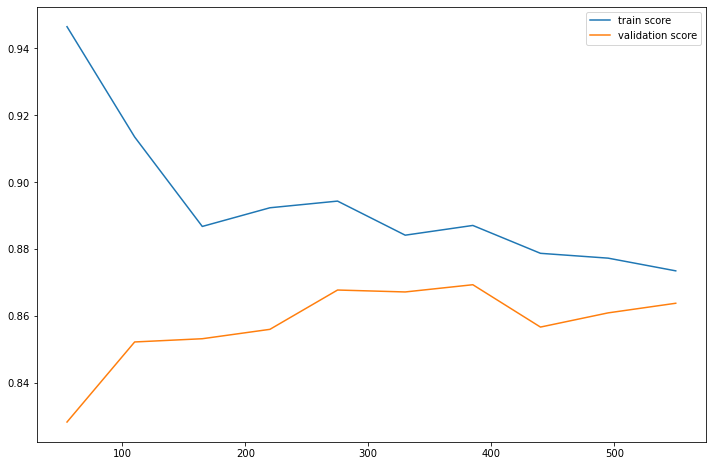

In [48]:
N, train_score, val_score = learning_curve(model_reg, x_train, y_train,
                                          cv=4, scoring='f1',
                                          train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

## 2. SVM

- svm à noyau polynomial

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [50]:
classifier= SVC(kernel='poly',random_state=0)
model_svm_poly=classifier.fit(x_train, y_train)

In [51]:
y_pred=model_svm_poly.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[57 20]
 [11 96]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        77
           1       0.83      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



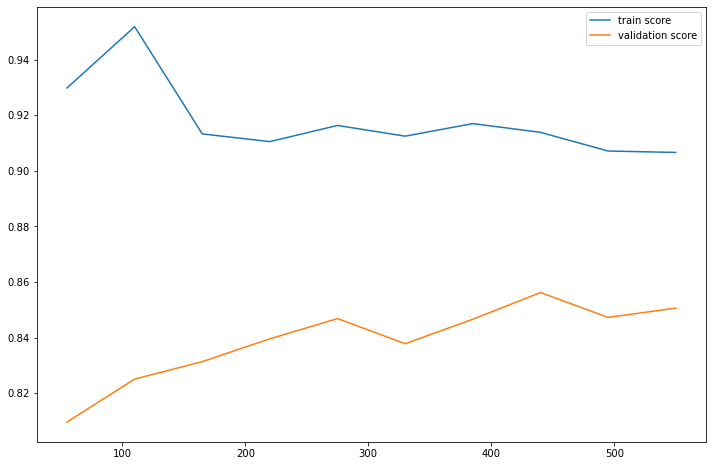

In [52]:
N, train_score, val_score = learning_curve(model_svm_poly, x_train, y_train,
                                          cv=4, scoring='f1',
                                          train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

* SVM a noyau rbf

In [53]:
# Créer une SVM avec un noyau rbf
classifier= SVC(kernel='rbf',random_state=0)
model_svm_rbf=classifier.fit(x_train,y_train)

In [54]:
model_svm_rbf.score(x_test,y_test)

0.8586956521739131

In [55]:
y_pred=model_svm_rbf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        77
           1       0.86      0.91      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



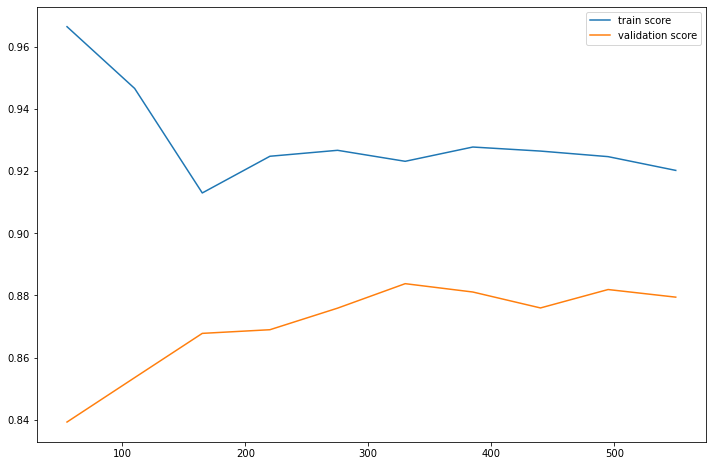

In [56]:
N, train_score, val_score = learning_curve(model_svm_rbf, x_train, y_train,
                                          cv=4, scoring='f1',
                                          train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

* La meilleure performance que j'ai eu est de 86% avec un SVM à noyau "RBF"